# UNSUPERVISED LEARNING 

##  CLUSTERING COUNTRIES USING SOCIO ECONOMIC FACTORS

### KMEANS AND BISECTING KMEANS ALGORITHMS



### Background

Social and economic factors, such as income, infant mortality, GDP and other Human Development Indices(HDI) can significantly affect how well and how long people live. These factors are what show the improvements or decline brought about by the impact of governments on the lives of their citizens. This project seeks to use the Kmeans and Bisecting Kmeans clustering algorithms to create groups of countries with similar socio economic performances

###  Objective

To cluster countries into groups based on similarity in their socio economic perfromance.


### Data Dictionary

The data has the following attributes:
- country: Name of the country
- child_mort: Death of children under 5 years of age per 1000 live births
- exports - Exports in % age of the GDP per capita
- health - The total spend on health given as % of GDP
- imports - The value of imports given as % of GDP per capita
- income - The net income per person
- inflation - Inflation rate %
- life_expec - Average life expectancy in years
- total_fer - The fertility rate - Average children per woman in the country
- gdpp - GDP per capita



## Importing Necessary libraries

In [190]:

#pip install --upgrade scikit-learn --user


In [191]:

#data wrangling and manipulation
import pandas as pd

#working with arrays and scientific computing
import numpy as np 

#plots and visualizations
import matplotlib.pylab as plt
import matplotlib.cm as cm
import seaborn as sns

#clustering algorithms
from sklearn.cluster import KMeans, BisectingKMeans
from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids 

#to evaluatae the silhouette score
from sklearn.metrics import silhouette_samples, silhouette_score


#for scaling data using z-score 
from sklearn.preprocessing import StandardScaler 


import warnings
warnings.filterwarnings("ignore")

## Loading the data

In [192]:
df = pd.read_csv("Country-data.csv")


## Inspecting the data

In [193]:
#Checking the first 5 rows of the data
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [194]:
#Checking the dimension 
df.shape

(167, 10)

- There are 167 entries and 10 variables in the dataset

In [195]:
#Checking for missing values
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [196]:
#Checking for duplicates
df.duplicated().sum()


0

In [197]:
df[df.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


- There are no duplicate values in the dataset

In [198]:
#Checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


- The dataset has been confirmed to contain 167 rows and 10 columns with no missing values.
- All columns of the data are numeric except the Country column which is non numeric.

## Exploratory Data Analysis

#### Descriptive Statistics

In [199]:
#Transpose of the descriptive stats so the statistical measures will appear as columns and for better visualization.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00



- The average rate of under 5 years child deaths per 1000 births is about 38. The least child mortality rate is about 3 deaths per 1000 live births while the highest is 208 deaths.

- Despite the maximum inflation being 104%, at least 50% of the countries have their inflation rate below 6%.

- Income has a very high range with the highest income being 125000 while the lowest income income is 609. 

- Also, In 75% of the counrtries, the net income per person is below $30,000.

- Similarly, the exports and imports have a high range of values. The maximum to minimum values for exports and imports are 
200%-0.1090% and 174%-0.0659% of GDP respectively.

- The average life expectancy is approx 70 years with 75% of the countries having a life expectancy of at least 65 Years.


#### Visualizing the distribution and outliers for each colum

The child_mort column has a Skew of 1.45


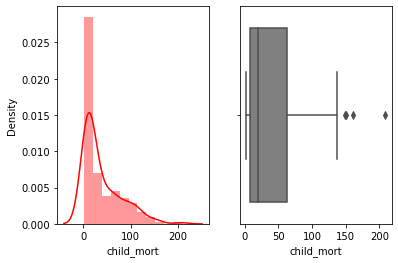

The exports column has a Skew of 2.45


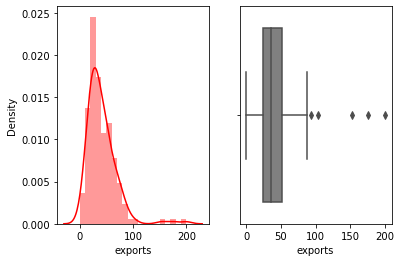

The health column has a Skew of 0.71


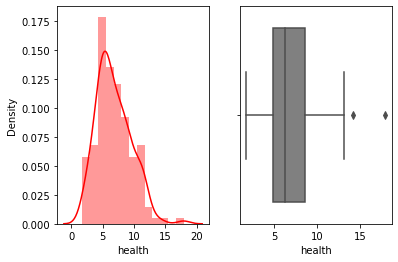

The imports column has a Skew of 1.91


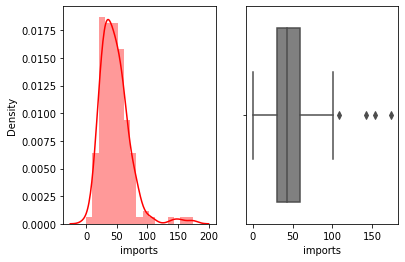

The income column has a Skew of 2.23


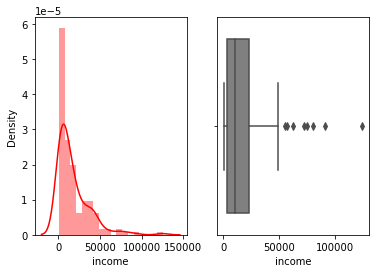

The inflation column has a Skew of 5.15


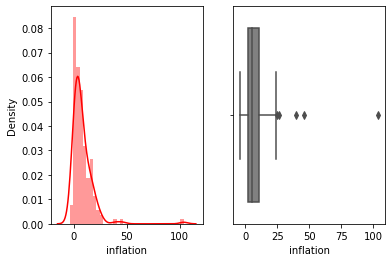

The life_expec column has a Skew of -0.97


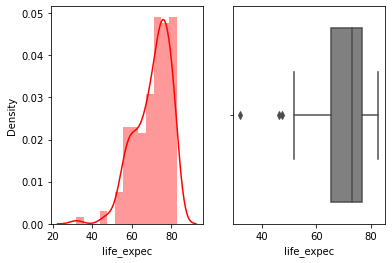

The total_fer column has a Skew of 0.97


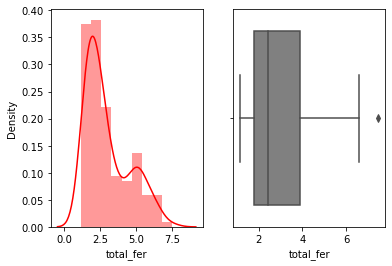

The gdpp column has a Skew of 2.22


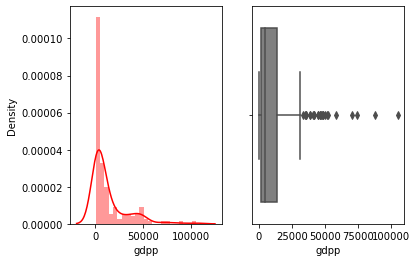

In [200]:
#Creating an array for columns in the data
my_columns = df.columns[1:]


#Looping through the column array and creating a histogram(for distribution) and box plot(to see outliers) for each column.

for column in my_columns:
    
    print(f'The {column} column has a Skew of {round(df[column].skew(),2)}')
    
    fig, axes = plt.subplots(1, 2)
    sns.distplot(df[column], color = 'red', ax = axes[0])
    sns.boxplot(df[column], color = 'grey', ax = axes[1])
    
    plt.show()
    


- Almost all the features have a positive skew and outliers to the right except the life expectancy which is skewed to the left and has its outliers on the left. This indicates that a lot of countries have a high life expectancy.

- Also a  positively skewed child mortality can be viewd as a good thing as every country hopes to make the number as close as possible to zero.

#### Correlation Analysis of the variables

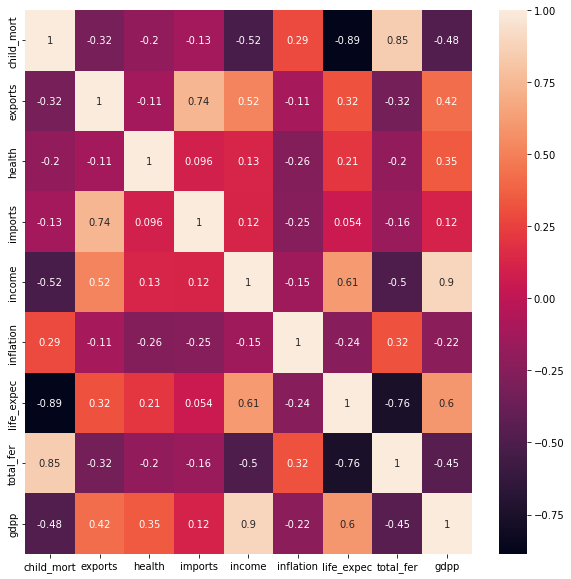

In [201]:
plt.figure(figsize  = (10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

- gdpp has a strong positive correlation with income showing that income levels are high when gdpp is high and vice versa. 
- There is also a positive correlation between life expectancy and income suggesting that people live longer in countries where the income levels are high.
- life expectancy also has a strong correlation with child mortality indicating that people live longer in countries where child mortality is low.
- the correlation between imports and health is almost zero suggesting that the value of imports has little or no impact on the amount spent on health.

## Data Preparation

- First the countries column has to be dropped as it is just a label and as such has not use. Also, the GDP of a country is usually a strong indicator of the class of a country but it will be dropped to enable to algorithm classify the countries based on a combination of other socio economic factors rather than just the GDP.

- The gdpp and country columns will be dropped.

In [202]:
new_df = df.drop(columns=["country", "gdpp"])

#### Scaling the data
Scaling helps to eliminate redundant data and ensures that good quality clusters are generated. Clustering algorithms like other distance based algorithms are hugely affected by the scale of the variables. Hence, Scaling is important.

In [203]:
#Scaling the data and storing the output as a new dataframe
scaler=StandardScaler()

df_scaled=pd.DataFrame(scaler.fit_transform(new_df), columns=new_df.columns)

df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946


In [204]:
#Creating a copy of the dataset for later use.
df_scaled_copy = df_scaled.copy(deep=True)

## Building the Clustering Model

### KMeans Clustering

Clustering using the Kmeans algorithm seeks to group similar objects into a specified number (K) of clusters.

The algorithm works in these simple steps:

1. Specify the number of clusters (K)
2. Specify the center-point of each cluster (also known as the Centroids)
3. Assign each data point to the closest centroid.
4. Find the mean of each cluster and update that as the centroid for the cluster
 
Repeat steps 3 and 4 until the centroid no longer changes (at which point there is said to be a convergence.)

Since the number of clusters must be specified, It is important to first find the optimum number of clusters.

This can be achieved using the Elbow Method or the Silhoute score.

#### Optimal K using Elbow Method

The Elbow Method plots the WCSS (within-cluster sum of squares) for a range of K values against K.

The Optimal value of K is the value of K just before the point where WCSS has little to no changes for each change in K.

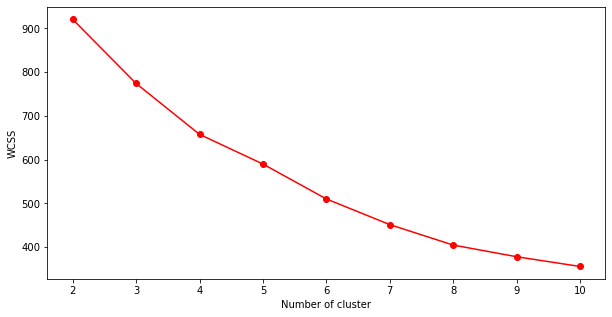

In [205]:
#Creating an empty dictionary to take the within-cluster sum of squares for each value of K
wcss = {} 

#Assuming the optimal value of k to be between 2 to 10, fitting the data to the kmeans algorithm
#and iterating through for each assumed value of k

#Then saving the  'intertia_' attribute for each value of k as wcss
#inertia_ returns the Sum of squared distances of samples to their closest cluster center

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df_scaled)
    wcss[k] = kmeans.inertia_ 

clusters = list(wcss.keys()) #creating a list of of k values from the dictionary
WCSS = list(wcss.values()) #creating a list of wcss vaalues from the dictionary


#visualizing the elbow plot

plt.figure(figsize=(10,5))
plt.plot(clusters, WCSS, 'ro-')
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.show()

From the plot above, there doesnt seem to be a clear elbow for the optimum value of k as significant changes can still be observed at every point from 2 to 10.


#### Optimal K using Silhoute Score

The Silhoute score is a metric for evaluating the quality of the quality of clusters by a clustering algorithm. It shows the level of distinction between the clusters created. It assumes values from -1 to 1 indicating wrong/No clustering to clearly distinguesd clusters respectively.

Comparing the silhoute scores from a clustering model assuming different values of k and choosing K from the model with the best score as the optimum value of K.

In [206]:
#Creating an empty dictionary to store the Silhouette score for each value of k
s_score = {} 

# iterating through for each value of k to fit the clustering model and storing the silhoutte score in the dictionary.

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df_scaled)
    labels = kmeans.predict(df_scaled)
    s_score[k] = silhouette_score(df_scaled, labels)

s_score_list = list(s_score.values()) #creating a list of wcss vaalues from the dictionary
s_clusters = list(s_score.keys()) #creating a list of cluster numbers


In [208]:
#creating a dataframe for the silhoutte score vs number of clusters.

data_dict ={'No_of_clusters':s_clusters, 'Silhoutte_Score': s_score_list }
s_score_td = pd.DataFrame(data=data_dict)
s_score_td.set_index('No_of_clusters').T

No_of_clusters,2,3,4,5,6,7,8,9,10
Silhoutte_Score,0.33177,0.350441,0.252744,0.224722,0.229735,0.237031,0.241543,0.216973,0.214653


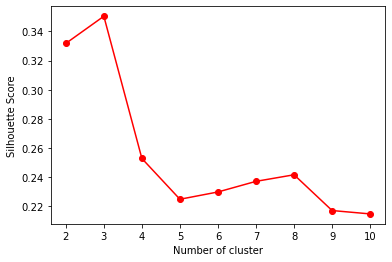

In [209]:
#Visualizing the Silhoutte Scores
plt.figure()
plt.plot(s_score_td['No_of_clusters'], s_score_td['Silhoutte_Score'], 'ro-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

Based on the Silhoute scores, the number of clusters for which the best quality clusters are formed is 3 with a score of 0.350441


### KMeans Clusterinig Model

In [210]:
#Using the KMeans algorithm to cluster the data in to 3 clusters.
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(df_scaled)

#Adding the predicted cluster back to the original dataframe.
df['KMeans_cluster'] = kmeans.predict(df_scaled)

In [211]:
#checking the distribution of countries into the clusters
df.KMeans_cluster.value_counts()

0    112
1     52
2      3
Name: KMeans_cluster, dtype: int64

The data frame has been classified into 3 clusters.

with majority of the countries clustered into one group and only 3 countries in another group.

In [215]:
#creating a table to compare the means for each cluster

original_features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

mean = df.groupby('KMeans_cluster').mean()
df_KM = pd.DataFrame(mean)
df_KM.index = ['Cluster_0 Mean', 'Cluster_1 Mean', 'Cluster_2 Mean']
df_KM[original_features].T

,Cluster_0 Mean,Cluster_1 Mean,Cluster_2 Mean
child_mort,15.703571,88.844231,4.133333
exports,43.487500,28.203827,176.000000
health,7.069464,6.270385,6.793333
imports,46.143750,42.164729,156.666667
income,22069.285714,3832.750000,64033.333333
inflation,6.042920,11.833750,2.468000
life_expec,75.215179,59.892308,81.433333
total_fer,2.119821,4.822115,1.380000
gdpp,16937.535714,1832.884615,57566.666667


Cluster 2 are countries with very low child mortality rate(about 5 per 1000 live births), high average income levels($64,033), low inflation rate and high GDP per capita - indicative of countries that are developed with positive socio economic factors

Cluster 1 seems the opposite of cluster 2, with extremely high child mortality rate(about 89 per 1000 live births), high inflation, low GDP per capita, and low income levels suggesting that they are made up of under developed countries.

Cluster 0 on the average have better socio-economic indices than countries in cluster 1 but not as good as Cluster 2 countries.
These may be developing countries.

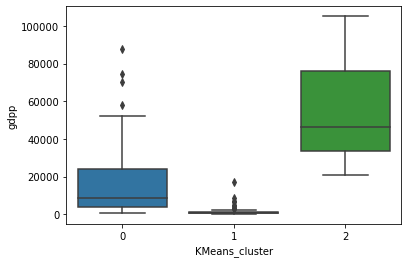

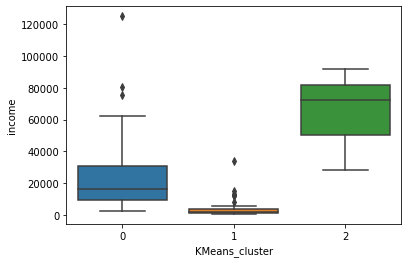

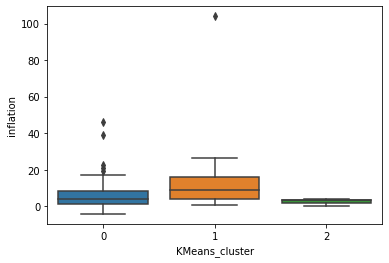

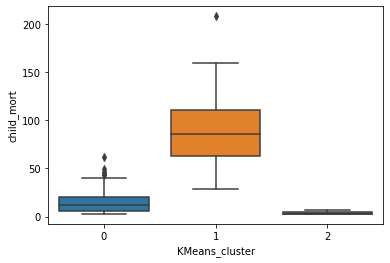

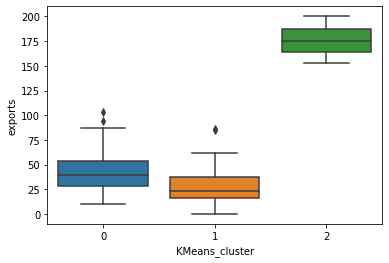

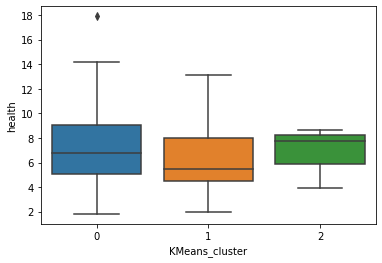

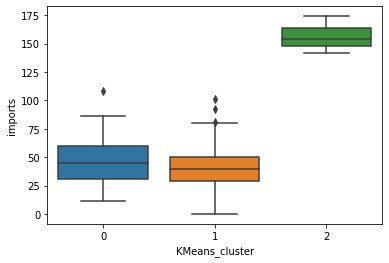

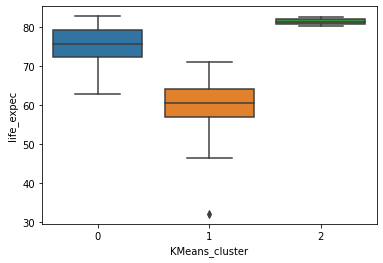

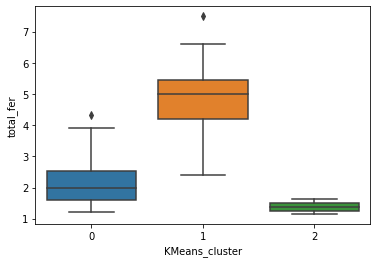

In [216]:
#VIsualizing the Clusters in a box plot

socio_eco = ['gdpp', 'income', 'inflation', 'child_mort', 'exports', 'health', 'imports', 'life_expec', 'total_fer']

for factor in socio_eco:
    sns.boxplot( y = factor, x = 'KMeans_cluster', data = df)
    plt.show()

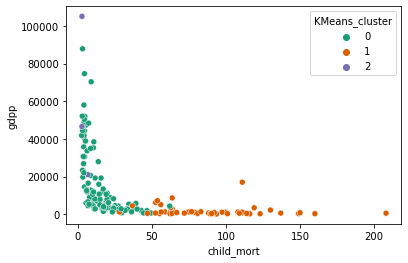

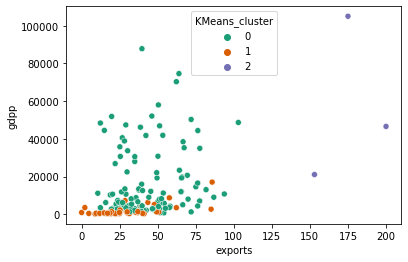

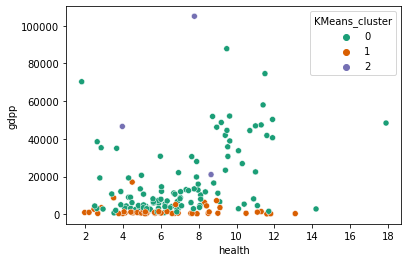

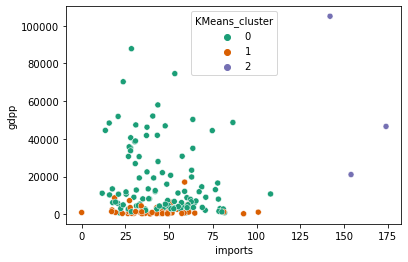

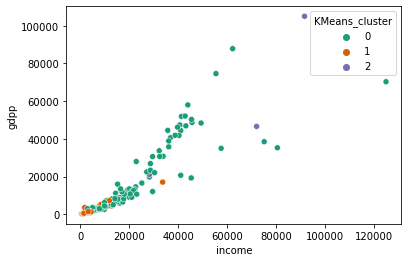

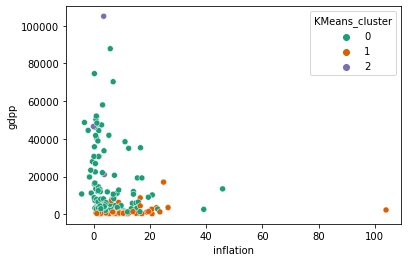

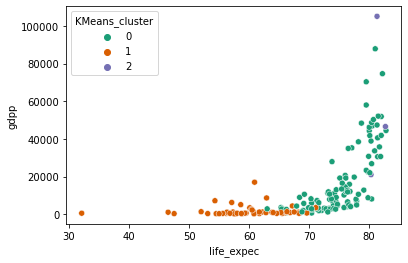

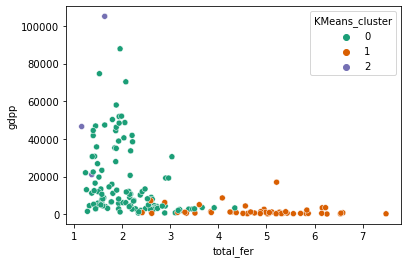

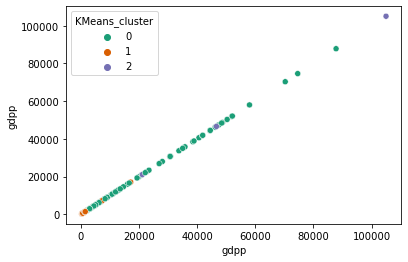

In [181]:
#Scatter Plot to show the clustering

cols_visualise = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

for col in cols_visualise:
    sns.scatterplot(x = col, y = 'gdpp',data = df ,hue='KMeans_cluster', palette='Dark2')
    plt.show()

In [225]:
#Viewing cluster 2 with only 3 countries

df[df.KMeans_cluster == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_cluster,BisectKM_cluster
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,2,0
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,2,0
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,2,0


#### FINDINGS

From the plots above,

Cluster 0 with majority of the countries is made up of countries with a wide range of socio economic indices. it has quite a number of outliers for most indices. This cluster may contain developed countries, developing countries or even a few under developed countries

Cluster 1 with 52 countries seem to be countries with low socio economic indices suggesting that they are mostly underdeveloped countries as indicated earlier.

Cluster 2 contains only 3 countries and they appear to be very rich countries with high income and gdpp, they are also part of the outlier countries with the highest export and imports. KMeans algorithm is known to be non-robust to outliers, as it has obviously created a separate cluster for some outliers.

Hence, for this data, it would be better to attempt clustering using other algorithms that are more robust to outliers.

###  Bisecting  KMeans

The Bisecting KMeans Algorithm is a variant of KMeans that uses divisive hierarchical clustering.

Instead of creating all centroids at once, centroids are picked progressively based on a previous clustering: a cluster is split into two new clusters repeatedly until the target number of clusters is reached, giving a hierarchical structure to the clustering.

In [217]:
#Using the Bisecting KMeans algorithm to cluster the data in to 3 clusters.
bisect_km = BisectingKMeans(n_clusters=3, random_state=1).fit(df_scaled)
df['BisectKM_cluster'] = bisect_km.predict(df_scaled)


In [218]:
#checking the distribution of countries into the clusters
df['BisectKM_cluster'].value_counts()

2    66
1    63
0    38
Name: BisectKM_cluster, dtype: int64

The Bisect_KM seem to have created better and more even clusters than the Kmeans model.

In [220]:
#creating a table to compare the means for each cluster
#list of indices have previously been created as original features

mean = df.groupby('BisectKM_cluster').mean()
df_BKM = pd.DataFrame(mean)
df_BKM.index = ['Cluster_0 Mean', 'Cluster_1 Mean', 'Cluster_2 Mean']
df_BKM[original_features].T

,Cluster_0 Mean,Cluster_1 Mean,Cluster_2 Mean
child_mort,5.271053,17.361905,77.227273
exports,61.323684,40.942857,29.628773
health,8.584474,6.646508,5.958788
imports,54.578947,47.828571,41.567665
income,44210.526316,14145.555556,4424.136364
inflation,2.480395,6.733746,11.834621
life_expec,79.660526,74.123810,61.907576
total_fer,1.716053,2.122222,4.445455
gdpp,40465.789474,7712.222222,2143.090909


based on the means and medians for each cluster, the bisect_Kmeans has also clusterd the countries into 3 groups indicative of developed, developing and developing countries.

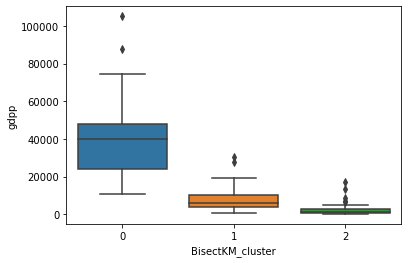

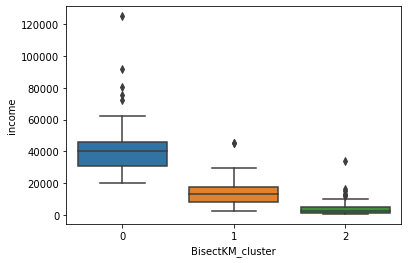

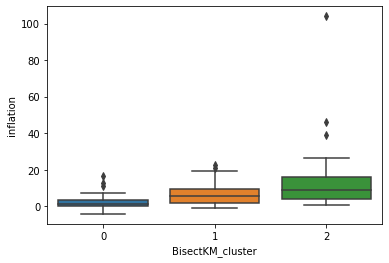

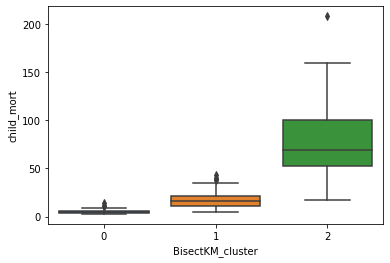

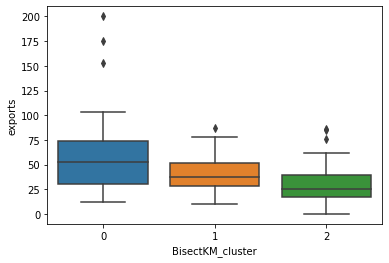

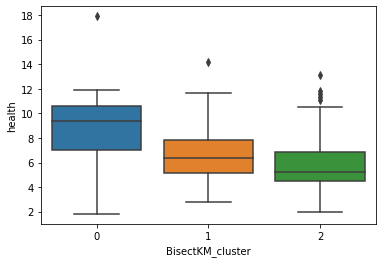

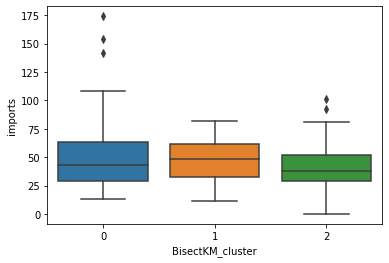

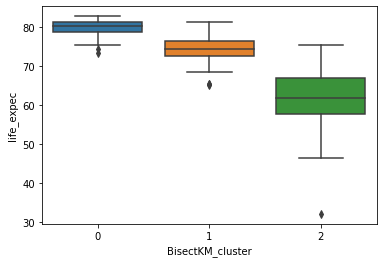

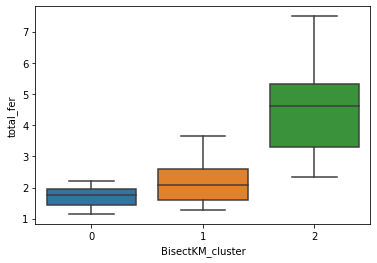

In [221]:
#VIsualizing the Clusters in a box plot

socio_eco = ['gdpp', 'income', 'inflation', 'child_mort', 'exports', 'health', 'imports', 'life_expec', 'total_fer']

for factor in socio_eco:
    sns.boxplot( y = factor, x = 'BisectKM_cluster', data = df)
    plt.show()

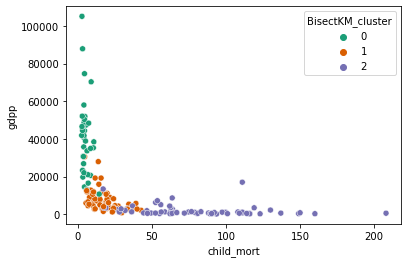

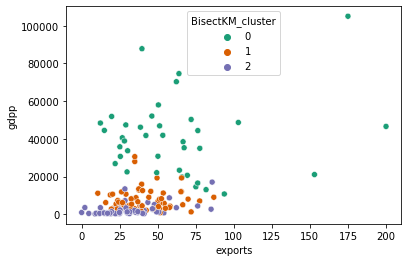

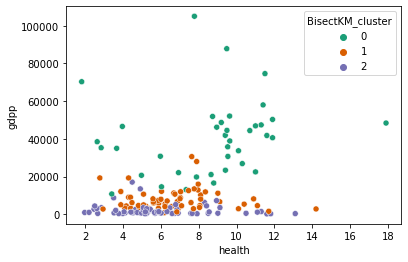

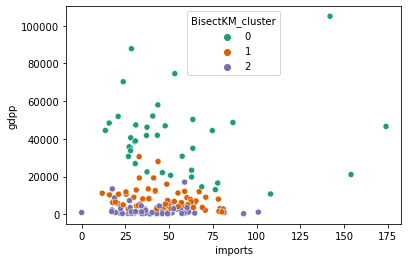

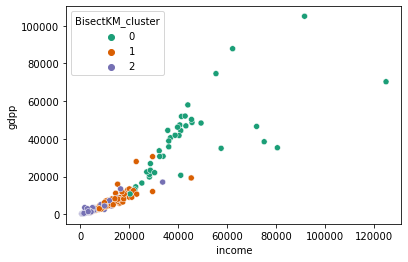

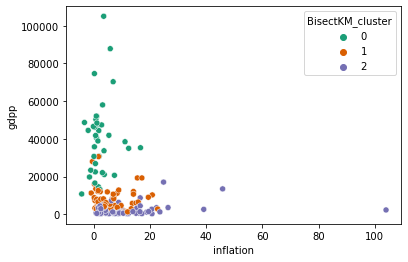

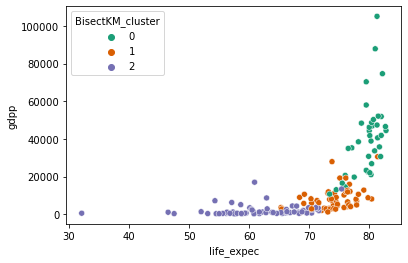

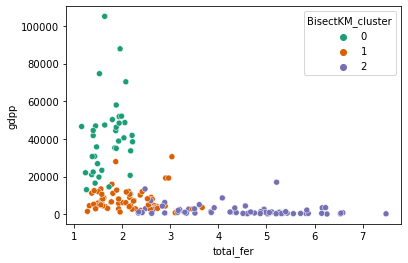

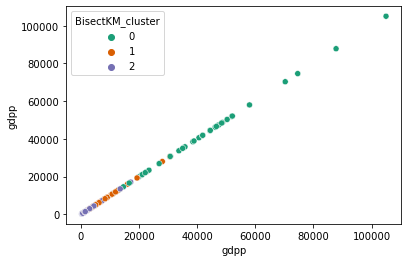

In [222]:
#Scatter Plot to show the clustering

cols_visualise = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

for col in cols_visualise:
    sns.scatterplot(x = col, y = 'gdpp',data = df ,hue='BisectKM_cluster', palette='Dark2')
    plt.show()

In [236]:
df[df.BisectKM_cluster == 2].tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_cluster,BisectKM_cluster
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,0,2
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,2
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,2
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1,2
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460,1,2


In [235]:
df[df.BisectKM_cluster == 1].tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_cluster,BisectKM_cluster
152,Tunisia,17.4,50.5,6.21,55.3,10400,3.82,76.9,2.14,4140,0,1
153,Turkey,19.1,20.4,6.74,25.5,18000,7.01,78.2,2.15,10700,0,1
156,Ukraine,11.7,47.1,7.72,51.1,7820,13.40,70.4,1.44,2970,0,1
160,Uruguay,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900,0,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,1


In [234]:
df[df.BisectKM_cluster == 0].tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_cluster,BisectKM_cluster
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100,0,0
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600,0,0
157,United Arab Emirates,8.6,77.7,3.66,63.6,57600,12.500,76.5,1.87,35000,0,0
158,United Kingdom,5.2,28.2,9.64,30.8,36200,1.570,80.3,1.92,38900,0,0
159,United States,7.3,12.4,17.90,15.8,49400,1.220,78.7,1.93,48400,0,0


From the clusters created by the Bisect_Kmeans algorithm:

Cluster 0 contains countries with the better socio economic indices on the average; higher GDP per capita, higher income, higher life expectancy and lower child mortality rate showing that they are developed countries. The Bisect_Kmeans model put 38 countries in this cluster, which makes more sense than the cluster created by the Kmeans model. Countries include the USA, UK and Switzerland.

Cluster 2 contains countries with averagely poor socio economic indices, this cluster is therefore largely made up of countries with traits of underdeveloped countries. Countries include Zambia, Yemen, Uzbekistan.

Cluster 1 countries on the average have higher income levels, higher GDP per capita, lower child mortality rate and generally better socio economic ratings tham the Cluster 2 countries but the fall short when compared with the average for Cluster 1 countries. These are most likely developing countries. Countries include Tunisia, Turkey, Uruguay.



## Conclusion

**The KMeans and Bisecting Kmeans algorithm succesfuly created 3 clusters of countries with the socio economic indices showing these Clusters to be developed, developing and underdeveloped countries.

**The Clusters created by the Bisecting KMeans algorithm are more evenly distributed than those created by the KMeans algorithm

**Bisecting KMeans algorithm is more robust to outliers.

**The Bisecting KMeans model is a better clustering model for this data.
